In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
%matplotlib inline
import seaborn
import numpy, scipy, IPython.display as ipd, matplotlib.pyplot as plt
import librosa, librosa.display
plt.rcParams['figure.figsize'] = (14, 5)

In [ ]:
filename_band_chorus = '/content/drive/Shareddrives/music_folder/audio/band/chorus/Open-Unmix_separated/Moves Like Jagger - Maroon 5_chorus_umxl/vocals.wav'
x_band, sr_band = librosa.load(filename_band_chorus)
filename_finger = '/content/drive/Shareddrives/music_folder/audio/fingerstyle/chorus/separated/BF_high_Moves Like Jagger (Maroon 5) fingerstyle guitar [0K-Y02XVxyw]_chorus.wav'
x_finger, sr_finger = librosa.load(filename_finger)

In [ ]:
ipd.Audio(x_band, rate=sr_band)

In [ ]:
ipd.Audio(x_finger, rate=sr_finger)

In [ ]:
import librosa
import numpy as np
import matplotlib.pyplot as plt

bins_per_octave = 36
cqt_band = librosa.cqt(x_band, sr=sr_band, n_bins=300, bins_per_octave=bins_per_octave)
log_cqt_band = librosa.amplitude_to_db(np.abs(cqt_band))


In [ ]:
import librosa
import numpy as np
import matplotlib.pyplot as plt

bins_per_octave = 36
cqt_finger = librosa.cqt(x_finger, sr=sr_finger, n_bins=300, bins_per_octave=bins_per_octave)
log_cqt_finger = librosa.amplitude_to_db(np.abs(cqt_finger))


In [ ]:
cqt_band.shape

(300, 646)

In [ ]:
cqt_finger.shape

(300, 646)

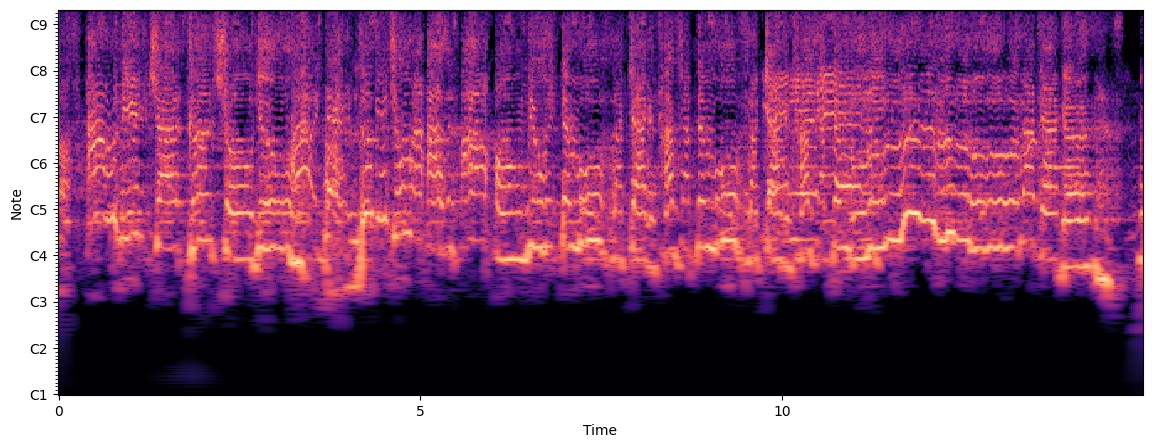

In [ ]:
librosa.display.specshow(log_cqt_band, sr=sr_band, x_axis='time', y_axis='cqt_note',
                         bins_per_octave=bins_per_octave)

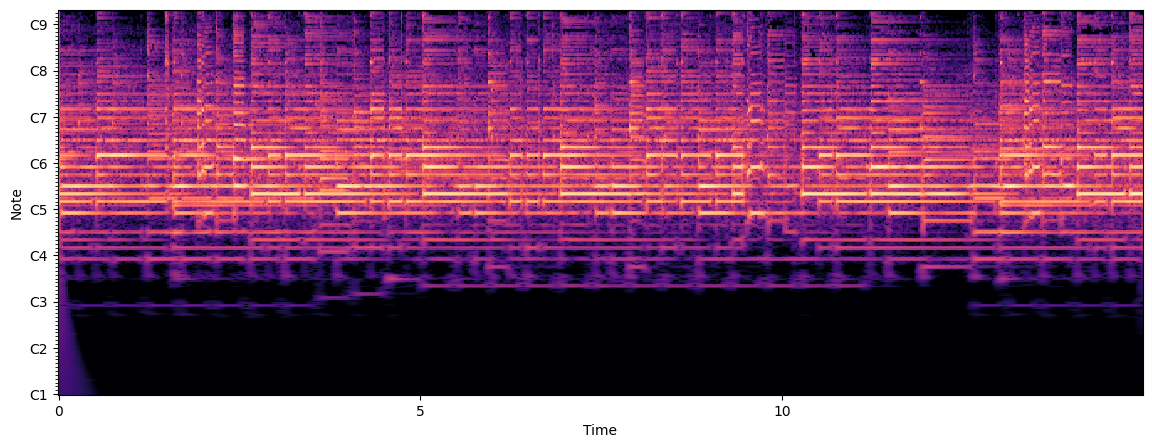

In [ ]:
librosa.display.specshow(log_cqt_finger, sr=sr_finger, x_axis='time', y_axis='cqt_note',
                         bins_per_octave=bins_per_octave)

In [ ]:
# Set the hop length
hop_length = 100

# Compute the onset strength
onset_env_band = librosa.onset.onset_strength(y=x_band, sr=sr_band, hop_length=hop_length)
onset_env_finger = librosa.onset.onset_strength(y=x_finger, sr=sr_finger, hop_length=hop_length)

In [ ]:
def estimate_pitch(segment, sr, fmin=50.0, fmax=2000.0):
    # Compute autocorrelation of input segment.
    r = librosa.autocorrelate(segment)
    # Define lower and upper limits for the autocorrelation argmax.
    i_min = sr/fmax
    i_max = sr/fmin
    r[:int(i_min)] = 0
    r[int(i_max):] = 0
    # Find the location of the maximum autocorrelation.
    i = r.argmax()
    f0 = float(sr)/i
    return f0

def generate_sine(f0, sr, n_duration):
    n = numpy.arange(n_duration)
    return 0.2*numpy.sin(2*numpy.pi*f0*n/float(sr))

def estimate_pitch_and_generate_sine(x, onset_samples, i, sr):
    n0 = onset_samples[i]
    n1 = onset_samples[i+1]
    f0 = estimate_pitch(x[n0:n1], sr)
    return generate_sine(f0, sr, n1-n0)

In [ ]:
onset_samples_band = librosa.onset.onset_detect(y=x_band,
                                           sr=sr_band, units='samples',
                                           hop_length=hop_length,
                                           backtrack=False,
                                           pre_max=20,
                                           post_max=20,
                                           pre_avg=100,
                                           post_avg=100,
                                           delta=0.2,
                                           wait=0)

In [ ]:
onset_samples_finger = librosa.onset.onset_detect(y=x_finger,
                                           sr=sr_finger, units='samples',
                                           hop_length=hop_length,
                                           backtrack=False,
                                           pre_max=20,
                                           post_max=20,
                                           pre_avg=100,
                                           post_avg=100,
                                           delta=0.2,
                                           wait=0)

In [ ]:
onset_boundaries_band = numpy.concatenate([[0], onset_samples_band, [len(x_band)]])
onset_boundaries_finger = numpy.concatenate([[0], onset_samples_finger, [len(x_finger)]])

In [ ]:
y_band = numpy.concatenate([
    estimate_pitch_and_generate_sine(x_band, onset_boundaries_band, i, sr=sr_band)
    for i in range(len(onset_boundaries_band)-1)
])
y_finger = numpy.concatenate([
    estimate_pitch_and_generate_sine(x_finger, onset_boundaries_finger, i, sr=sr_finger)
    for i in range(len(onset_boundaries_finger)-1)
])

In [ ]:
cqt_band = librosa.cqt(y_band, sr=sr_band)

In [ ]:
cqt_finger = librosa.cqt(y_finger, sr=sr_finger)

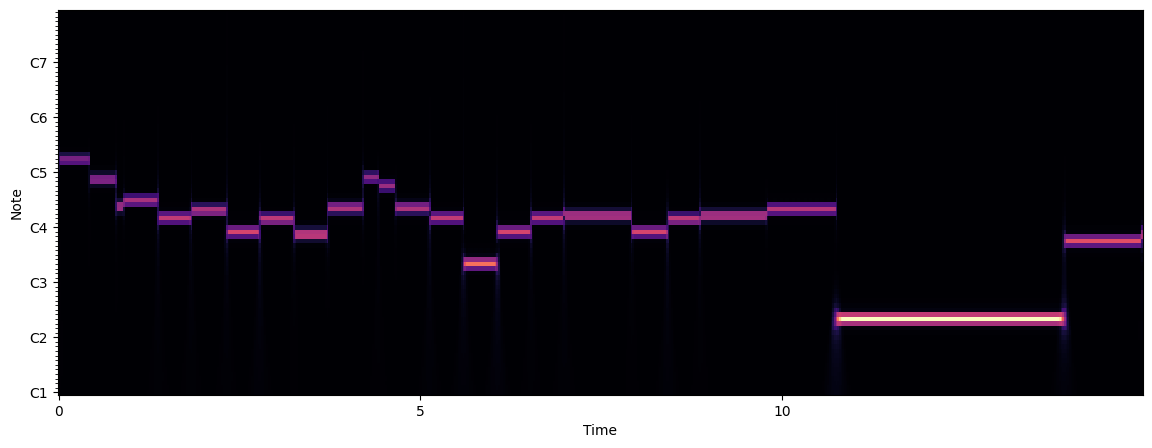

In [ ]:
librosa.display.specshow(abs(cqt_band), sr=sr_band, x_axis='time', y_axis='cqt_note')

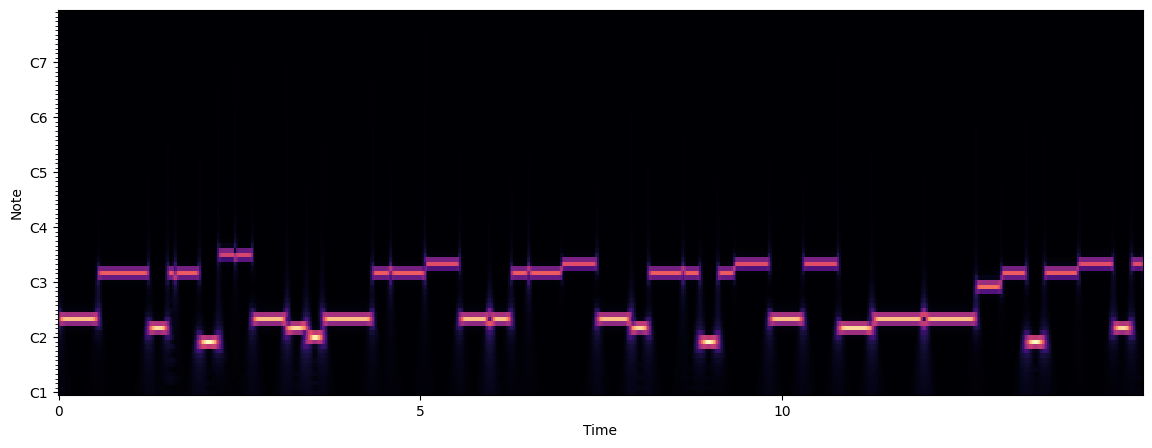

In [ ]:

librosa.display.specshow(abs(cqt_finger), sr=sr_finger, x_axis='time', y_axis='cqt_note')